In [4]:
import numpy as np       #linear algebra
import pandas as pd      #data processing ,csv file I/o
from google.colab import drive
drive.mount('/content/drive/')  #connecting google drive with google colab


Mounted at /content/drive/


Exploratory Data Analysis

Load and prepare Data



In [6]:
#loading the data
df = pd.read_excel('/content/drive/MyDrive/Dataset/Restaurant_Reviews.xlsx')

In [7]:
df.shape

(1000, 2)

In [8]:
df.head(8)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [9]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [11]:
#Importing essential libraries for performing natural language processing on restaurant review dataset

import nltk              #natural language toolkit,is a python package that you can use for NLP
import re            #python has inbuilt packagr called re, which can use to work with regular expressions
nltk.download('stopwords')   #the NLTK corpus is a massive dump of all kinds of natural language data sets that are definently worth taking a look at
from nltk.corpus import stopwords    #A stop is a commonly used word (such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer   # Porters stemmer it is a stemmer which is mainly known for data mining and information retrival


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
corpus = []
for i in range(0,1000):

  #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)


In [13]:
corpus[0:1300]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'nan',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',
 

In [14]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values


Split Data - (1000,1300)

In this step, we are going to split data in two parts (training and testing),so that we can train our model on training dataset and test its accuracy on unseen test data.




In [15]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. if you dont set seed, it is difficult to each time

#Training (1000,1500)
#1000 * 80/100 = 800
#1000 * 20/100 = 200



In [16]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. if you dont set seed, it is difficult to each time

#Training (1000,1500)
#1000 * 80/100 = 800
#1000 * 20/100 = 200



# *Model Training*

As we done with preprocessing part, it is time to train our model.

***Multinomial Naive Bayes***
 The algorithm is a probabilistic learning method that is mostly Used in Natural Language Processing(NLP).The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article

In [17]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)  #fit training data

MultinomialNB()

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_test


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [20]:
#Accuracy,Prediction and Recall

from sklearn.metrics import accuracy_score
#in python, the accuracy_score function of the sklearn. metrics package calculates the accuracy the accuracy score for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("precision_score is : {}%".format(round(score2*100,2)))
print("recall_score is : {}%".format(round(score3*100,2)))

-------scores--------
Accuracy score is : 75.5%
precision_score is : 75.0%
recall_score is : 78.64%


In [21]:
#making the confusion matrix
#A confusion matrix is table that is used to define the performance of a classification algorithm.
#A confusion matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)



In [23]:
cm

array([[70, 27],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

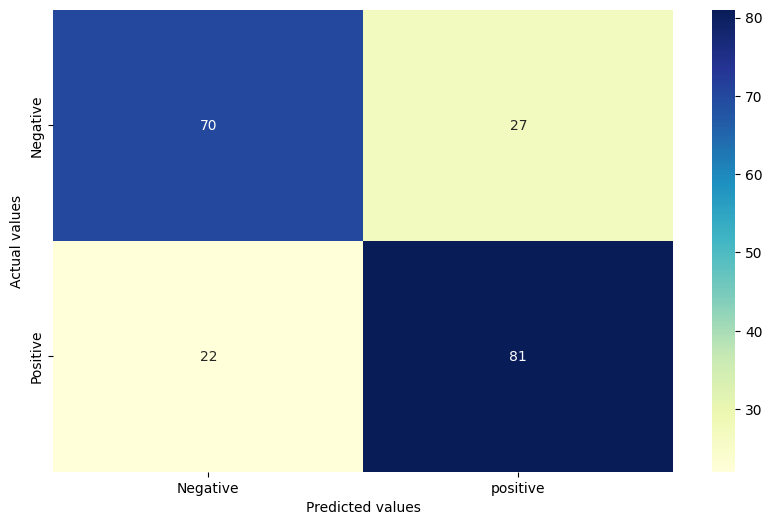

In [22]:
#plotting the confusion matrix

import matplotlib.pyplot as plt   #matplotlib is a low level graph plotting library in python that servs as a visualization utility
import seaborn as sns    #seaborn is python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [24]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("-------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha = 0.1 is : 77.5%
Accuracy score for alpha = 0.2 is : 78.0%
Accuracy score for alpha = 0.3 is : 77.5%
Accuracy score for alpha = 0.4 is : 77.5%
Accuracy score for alpha = 0.5 is : 76.5%
Accuracy score for alpha = 0.6 is : 76.5%
Accuracy score for alpha = 0.7 is : 76.5%
Accuracy score for alpha = 0.8 is : 75.5%
Accuracy score for alpha = 0.9 is : 75.5%
Accuracy score for alpha = 1.0 is : 75.5%
-------------------------------------------
The best accuracy is 78.0% with alpha value as 0.2


In [25]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train,y_train)


MultinomialNB(alpha=0.2)

# *Predictions*

In [26]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [32]:
sample_review = 'The management is rude.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')


This is Negative review!


In [34]:

sample_review = 'Sooooo good!!'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review!')
else:
  print('This is Negative review!')

This is a POSITIVE review!


In [33]:
sample_review = 'This place has it!'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review!')
else:
  print('This is Negative review!')


This is a POSITIVE review!
